# Building a Canned DNN Estimator for MNIST

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np

import tensorflow as tf

/home/samwit/anaconda3/envs/tf140-gpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
print(tf.__version__)

1.4.0


In [3]:
batch_size = 128
learning_rate = 0.001

## Dataset MNIST

We are loading 70,000 pictures of hand written digits

We are using 60k for our training set and 10k for our test set

In the Canned Estimator we don't have to change our labels to One Hot Encoded




In [4]:
# We'll use tf.keras to import our data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# Normalize the color values to 0-1
# (as imported, they're 0-255)
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# Set up a ploting function 

fig_size = [10,10]
plt.rcParams["figure.figsize"] = fig_size

def plot_images(images, labels_true, preds=None):

    fig, axes = plt.subplots(5, 5)
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # True vs predicted labels
        if preds is None:
            xlabel = "True: {0}".format(labels_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(labels_true[i], preds[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Draw the plot
    plt.show()

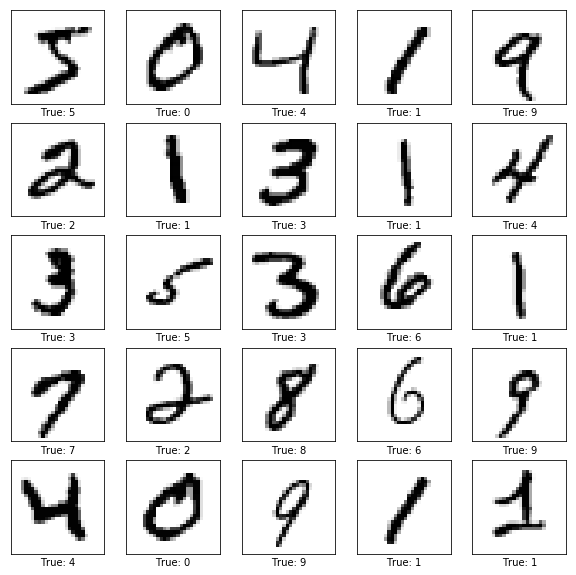

In [6]:
plot_images(x_train[:25],y_train[:25])

## Create input functions.

We create an training input function for use in training and a test input function for evaluating the model on data it hasn't seen before

In [7]:
train_input = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train, 
    num_epochs=None, # repeat forever we will use the steps to determine the number of iterations
    shuffle=True # We shuffle for training batches
)

test_input = tf.estimator.inputs.numpy_input_fn(
    {'x': x_test},
    y_test,
    num_epochs=1, # 1 epoch is enough as just predicting
    shuffle=False # don't need to shuffle the test data as we are predicting
)

## Features

In [8]:
# define the features for our model

# Set up a place holder for our pixel features
pixel_features = tf.feature_column.numeric_column('x', shape=784)

# we place our indvidual features into a list of features that we will pass into the estimator
features = [pixel_features]

## Our Canned DNN Classifier Estimator

Here we are defining our Estimator and passing params such as th 

In [9]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[256,100], # This is where we set the number of layers 
    feature_columns=features, 
    n_classes=10, # number 
    model_dir="./graphs/canned/deep")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './graphs/canned/deep', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff2344103c8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Start the training loop

In [10]:
# I've arbitrarily decided to train for 2000 steps
estimator.train(train_input, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./graphs/canned/deep/model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into ./graphs/canned/deep/model.ckpt.
INFO:tensorflow:loss = 6.4674, step = 2001
INFO:tensorflow:global_step/sec: 817.479
INFO:tensorflow:loss = 7.26882, step = 2101 (0.123 sec)
INFO:tensorflow:global_step/sec: 921.841
INFO:tensorflow:loss = 0.745728, step = 2201 (0.108 sec)
INFO:tensorflow:global_step/sec: 914.128
INFO:tensorflow:loss = 2.61075, step = 2301 (0.109 sec)
INFO:tensorflow:global_step/sec: 846.865
INFO:tensorflow:loss = 3.90418, step = 2401 (0.118 sec)
INFO:tensorflow:global_step/sec: 906.869
INFO:tensorflow:loss = 5.86997, step = 2501 (0.110 sec)
INFO:tensorflow:global_step/sec: 918.022
INFO:tensorflow:loss = 2.33313, step = 2601 (0.109 sec)
INFO:tensorflow:global_step/sec: 909.064
INFO:tensorflow:loss = 0.776895, step = 2701 (0.110 sec)
INFO:tensorflow:global_step/sec: 900.633
INFO:tensorflow:loss = 3.14446

## Evaluate the model

In [11]:
# Expect accuracy around 97%
estimator.evaluate(input_fn=test_input)

INFO:tensorflow:Starting evaluation at 2017-11-21-02:48:56
INFO:tensorflow:Restoring parameters from ./graphs/canned/deep/model.ckpt-4000
INFO:tensorflow:Finished evaluation at 2017-11-21-02:48:57
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.9775, average_loss = 0.081165, global_step = 4000, loss = 10.274


{'accuracy': 0.97750002,
 'average_loss': 0.081164986,
 'global_step': 4000,
 'loss': 10.274049}

### Individual predictions

In [12]:
MAX_TO_PRINT = 10

# This returns a generator object
predictions = estimator.predict(input_fn=test_input)

# we get the prdictions into a list
preds = [pred['class_ids'] for pred in predictions]

for i in range(MAX_TO_PRINT):
    true_label = y_test[i]
    pred = preds[i][0]
    print("Example %d. True: %d, Predicted: %d" % (i, true_label, pred))


INFO:tensorflow:Restoring parameters from ./graphs/canned/deep/model.ckpt-4000
Example 0. True: 7, Predicted: 7
Example 1. True: 2, Predicted: 2
Example 2. True: 1, Predicted: 1
Example 3. True: 0, Predicted: 0
Example 4. True: 4, Predicted: 4
Example 5. True: 1, Predicted: 1
Example 6. True: 4, Predicted: 4
Example 7. True: 9, Predicted: 9
Example 8. True: 5, Predicted: 5
Example 9. True: 9, Predicted: 9


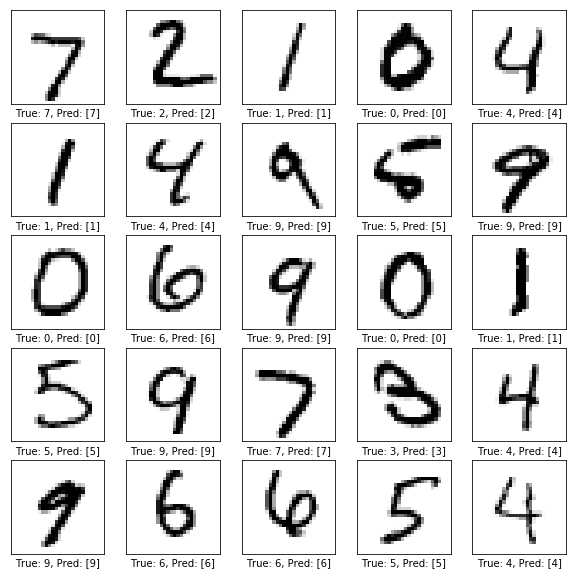

In [13]:
plot_images(x_test[:25],y_test[:25],preds[:25])

In [14]:
!tensorboard --logdir=graphs/canned/

/home/samwit/anaconda3/envs/tf140-gpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
TensorBoard 0.4.0rc3 at http://samwit-Z170X-UD5:6006 (Press CTRL+C to quit)
W1121 10:48:59.329255 Reloader tf_logging.py:86] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1121 10:48:59.329416 Reloader tf_logging.py:86] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W1121 10:48:59.343441 Reloader tf_logging.py:86] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1121 10:48:59.343616 Reloader tf_logging.py:86] Found more than one metagraph event per run. Over